In [1]:
import time
import os
import re
import datetime
import glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# ディビジョンを日本語に
def div_ja(division):
    sex = '男子' if division[-1]=='m' else '女子'
    return 'V{0}{1}'.format(division[1], sex)

In [56]:
division = 'v1_w'
paths = glob.glob('../database/{}/teamdb_*'.format(division))
# paths = paths[-5:]
print(paths)

['../database/v1_w\\teamdb_1999-00_regular.csv', '../database/v1_w\\teamdb_2000-01_regular.csv', '../database/v1_w\\teamdb_2001-02_regular.csv', '../database/v1_w\\teamdb_2002-03_regular.csv', '../database/v1_w\\teamdb_2003-04_regular.csv', '../database/v1_w\\teamdb_2004-05_regular.csv', '../database/v1_w\\teamdb_2005-06_regular.csv', '../database/v1_w\\teamdb_2006-07_regular.csv', '../database/v1_w\\teamdb_2007-08_regular.csv', '../database/v1_w\\teamdb_2008-09_regular.csv', '../database/v1_w\\teamdb_2009-10_regular.csv', '../database/v1_w\\teamdb_2010-11_regular.csv', '../database/v1_w\\teamdb_2011-12_regular.csv', '../database/v1_w\\teamdb_2012-13_regular.csv', '../database/v1_w\\teamdb_2013-14_regular.csv', '../database/v1_w\\teamdb_2014-15_regular.csv', '../database/v1_w\\teamdb_2015-16_regular.csv', '../database/v1_w\\teamdb_2016-17_regular.csv', '../database/v1_w\\teamdb_2017-18_regular.csv', '../database/v1_w\\teamdb_2018-19_regular.csv', '../database/v1_w\\teamdb_2019-20_regul

In [57]:
division = 'v1_w'
year = '2021-22_regular'
player_db_path =  '../database/{0}/playerdb_{1}.csv'.format(division,year)
team_db_path =  '../database/{0}/teamdb_{1}.csv'.format(division,year)
player_db = pd.read_csv(player_db_path)
team_db = pd.read_csv(team_db_path)
team_db.head()

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BASucc%,BP,...,OpBP/S,OpSVA,OpSVP,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%
0,158,63,16,39.9,15.75,14,4,0,28.6,6,...,2.50,93,1,10,27,5.6,91,47.0,10.0,57.1
1,158,56,15,35.4,14.00,10,1,1,10.0,10,...,1.50,97,4,5,31,10.8,82,39.0,16.0,57.3
2,152,44,14,28.9,11.00,22,2,4,9.1,9,...,2.00,95,5,9,23,8.9,78,43.0,13.0,63.5
3,149,61,12,40.9,15.25,22,10,4,45.5,8,...,2.25,86,3,7,21,7.6,85,41.0,18.0,58.8
4,94,52,5,55.3,17.33,11,6,1,54.5,7,...,0.67,47,0,2,12,5.3,65,15.0,23.0,40.8


In [58]:
team_db.columns

Index(['AA', 'AP', 'AE', 'ASucc%', 'AP/S', 'BAA', 'BAP', 'BAE', 'BASucc%',
       'BP', 'BP/S', 'SVA', 'SVP', 'SVE', 'SVx', 'SVEff%', 'RA', 'Rx', 'Rg',
       'RSucc%', 'MatchNo.', 'Date', 'Year', 'Month', 'Day', 'Place', 'Venue',
       'Team', 'Op.Team', 'Director', 'Coach', 'Win_Set', 'Lose_Set',
       'Total_Set', 'Win_Lose', 'Get_Point', 'Lose_Point', 'Game_Time',
       'Start_Time', 'End_Time', 'Spectators', 'Jury', 'Chief_Umpire',
       'Sub_Umpire', 'Judgeman', 'Home_Away', 'OpAA', 'OpAP', 'OpAE',
       'OpASucc%', 'OpAP/S', 'OpBAA', 'OpBAP', 'OpBAE', 'OpBASucc%', 'OpBP',
       'OpBP/S', 'OpSVA', 'OpSVP', 'OpSVE', 'OpSVx', 'OpSVEff%', 'OpRA',
       'OpRx', 'OpRg', 'OpRSucc%'],
      dtype='object')

In [59]:
team_db_total = team_db.groupby('Team').sum()
team_db_total[['Win_Set', 'Lose_Set']]

,Win_Set,Lose_Set
Team,,
JTマーヴェラス,83,30
KUROBEアクアフェアリーズ,20,94
NECレッドロケッツ,78,43
PFUブルーキャッツ,50,69
デンソーエアリービーズ,67,57
トヨタ車体クインシーズ,43,78
ヴィクトリーナ姫路,49,86
久光スプリングス,82,44
埼玉上尾メディックス,72,55


In [60]:
team_db['Set'] = team_db['Win_Set'] + team_db['Lose_Set']

In [61]:
def stats_calc(df):
    df['Set'] = df['Win_Set'] + df['Lose_Set']
    df['ASucc%'] = ((df['AP'] / df['AA']) * 100).round(1)
    df['AEff%'] = (((df['AP']-df['AE']) /
                     df['AA']) * 100).round(1)
    df['BASucc%'] = ((df['BAP'] / df['BAA']) * 100).round(1)
    df['AP/S'] = (df['AP'] / df['Set']).round(2)
    df['BP/S'] = (df['BP'] / df['Set']).round(2)
    df['SVEff%'] = ((df['SVP'] * 100 + df['SVx'] * 25 -
                    df['SVE'] * 25) / df['SVA']).round(1)
    df['RSucc%'] = (
        (df['Rx'] * 100 + df['Rg'] * 50) / df['RA']).round(1)
    return df

In [62]:
team_db_total = stats_calc(team_db_total)
team_db_total

,AA,AP,AE,ASucc%,AP/S,BAA,BAP,BAE,BP,BP/S,...,OpSVE,OpSVx,OpSVEff%,OpRA,OpRx,OpRg,OpRSucc%,Set,AEff%,BASucc%
Team,,,,,,,,,,,,,,,,,,,,,
JTマーヴェラス,4331,1797,230,41.5,15.90,731,315,78,238,2.11,...,207,503,186.0,2445,1189.0,534.0,1907.1,113,36.2,43.1
KUROBEアクアフェアリーズ,4225,1398,257,33.1,12.26,456,154,58,221,1.94,...,209,762,331.7,2054,888.0,513.0,1868.8,114,27.0,33.8
NECレッドロケッツ,4696,1875,229,39.9,15.50,417,145,46,259,2.14,...,230,688,262.6,2571,1076.0,700.0,1828.2,121,35.1,34.8
PFUブルーキャッツ,4492,1704,227,37.9,14.32,334,144,33,225,1.89,...,224,687,259.7,2277,1141.0,518.0,1951.2,119,32.9,43.1
デンソーエアリービーズ,5266,1891,266,35.9,15.25,663,168,62,228,1.84,...,231,676,266.1,2601,1172.0,671.0,1912.6,124,30.9,25.3
トヨタ車体クインシーズ,4676,1692,344,36.2,13.98,564,174,75,241,1.99,...,199,665,271.4,2362,949.0,606.0,1762.5,121,28.8,30.9
ヴィクトリーナ姫路,5384,1966,325,36.5,14.56,341,121,38,220,1.63,...,193,886,306.4,2585,1160.0,517.0,1831.6,135,30.5,35.5
久光スプリングス,4902,1952,247,39.8,15.49,261,72,21,256,2.03,...,227,595,233.7,2684,1120.0,665.0,1785.6,126,34.8,27.6
埼玉上尾メディックス,5188,1985,252,38.3,15.63,595,196,43,269,2.12,...,207,718,245.7,2601,1354.0,572.0,2077.7,127,33.4,32.9


In [63]:
team_db_main = team_db_total[['ASucc%', 'BASucc%', 'BP/S', 'SVEff%', 'RSucc%']]
team_db_main

,ASucc%,BASucc%,BP/S,SVEff%,RSucc%
Team,,,,,
JTマーヴェラス,41.5,43.1,2.11,8.1,63.5
KUROBEアクアフェアリーズ,33.1,33.8,1.94,7.8,53.9
NECレッドロケッツ,39.9,34.8,2.14,8.6,54.1
PFUブルーキャッツ,37.9,43.1,1.89,7.2,56.2
デンソーエアリービーズ,35.9,25.3,1.84,7.6,57.2
トヨタ車体クインシーズ,36.2,30.9,1.99,9.7,58.4
ヴィクトリーナ姫路,36.5,35.5,1.63,8.9,55.5
久光スプリングス,39.8,27.6,2.03,9.0,61.1
埼玉上尾メディックス,38.3,32.9,2.12,6.4,57.3


In [64]:
team_db_main_std = team_db_main.apply(lambda x: (x-x.mean())/x.std())
team_db_main_std

,ASucc%,BASucc%,BP/S,SVEff%,RSucc%
Team,,,,,
JTマーヴェラス,1.380784,1.170550,1.050200,-0.007692,2.074316
KUROBEアクアフェアリーズ,-1.638371,0.159456,0.138537,-0.284622,-1.239987
NECレッドロケッツ,0.805707,0.268175,1.211082,0.453856,-1.170939
PFUブルーキャッツ,0.086861,1.170550,-0.129599,-0.838480,-0.445935
デンソーエアリービーズ,-0.631986,-0.764663,-0.397735,-0.469241,-0.100695
トヨタ車体クインシーズ,-0.524159,-0.155832,0.406673,1.469262,0.313593
ヴィクトリーナ姫路,-0.416332,0.344279,-1.523907,0.730785,-0.687603
久光スプリングス,0.769765,-0.514607,0.621182,0.823095,1.245741
埼玉上尾メディックス,0.230630,0.061608,1.103827,-1.576957,-0.066171


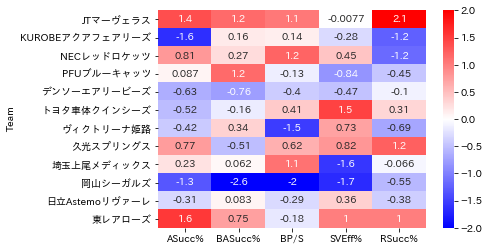

In [65]:
sns.heatmap(team_db_main_std, annot=True, cmap='bwr',vmax=2, vmin=-2)
plt.savefig('test.png', facecolor='white',bbox_inches="tight")
plt.show()